<a href="https://colab.research.google.com/github/swathi-pedanayuni/project/blob/main/HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving heart_disease_data.csv to heart_disease_data.csv


In [3]:
import io
df=pd.read_csv(io.BytesIO(uploaded['heart_disease_data.csv']))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f1dc26550>,
      dtype=object)

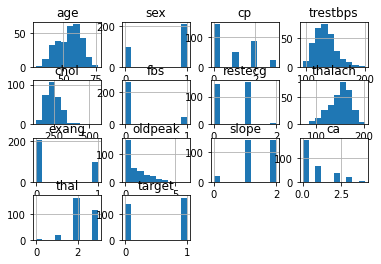

In [9]:
df.hist()

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

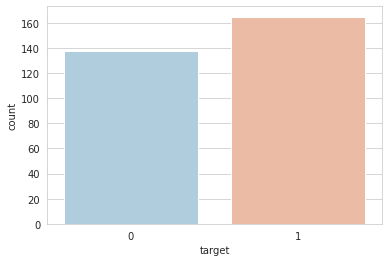

In [11]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [12]:
#splitting the features and target

x=df.drop(columns='target',axis=1)
y=df['target']

In [13]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [15]:
#splitting the data into training data & testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [16]:
print(x.shape,x_train.shape,x_test.shape)


(303, 13) (242, 13) (61, 13)


In [17]:
print(y.shape,y_train.shape,y_test.shape)

(303,) (242,) (61,)


In [18]:
#logistic regression  training  the model
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
#accuracy on the training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [20]:
training_data_accuracy

0.8512396694214877

In [21]:
#accuracy on the test data
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [22]:
testing_data_accuracy

0.819672131147541

In [23]:
input_data=(56,0,1,140,294,0,0,153,0,1.3,1,0,2)

#change the input into a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predecting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
if(input_data[0]==0): print('there is no person exist')
else:
  prediction=model.predict(input_data_reshaped)
  print(prediction)
  if(prediction[0]==0 ):
    print('the person does not have heart disease')
  else:
    print('the person have  heart disease')


[1]
the person have  heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
i=df.query("sex==1 and target==1")
i

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [25]:
i=df.query("sex==0 and target==1")
i

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


In [26]:
df=i.loc[i["age"].idxmax()]
df

age          76.0
sex           0.0
cp            2.0
trestbps    140.0
chol        197.0
fbs           0.0
restecg       2.0
thalach     116.0
exang         0.0
oldpeak       1.1
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 144, dtype: float64

In [27]:
df=i.loc[i["age"].idxmax()]
df

age          76.0
sex           0.0
cp            2.0
trestbps    140.0
chol        197.0
fbs           0.0
restecg       2.0
thalach     116.0
exang         0.0
oldpeak       1.1
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 144, dtype: float64

In [28]:
df=i.loc[i['age'].idxmin()]
df

age          34.0
sex           0.0
cp            1.0
trestbps    118.0
chol        210.0
fbs           0.0
restecg       1.0
thalach     192.0
exang         0.0
oldpeak       0.7
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 125, dtype: float64

In [29]:
df=i.loc[i["chol"].idxmax()]
df

age          67.0
sex           0.0
cp            2.0
trestbps    115.0
chol        564.0
fbs           0.0
restecg       0.0
thalach     160.0
exang         0.0
oldpeak       1.6
slope         1.0
ca            0.0
thal          3.0
target        1.0
Name: 85, dtype: float64

In [30]:
#model training using xgboost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier()

In [31]:
#accuracy on the training data
x_train_prediction=xgb_classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [32]:
training_data_accuracy

0.987603305785124

In [33]:
#accuracy on the test data
x_test_prediction=xgb_classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [34]:
testing_data_accuracy

0.7540983606557377

In [35]:
input_data=(70,1,0,130,253,0,0,144,1,1.4,2,1,2)

#change the input into a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predecting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=xgb_classifier.predict(input_data_reshaped,validate_features=False)
if(input_data[0]==0): print('there is no person exist')
else:
  prediction=model.predict(input_data_reshaped)
  print(prediction)
  if(prediction[0]==0 ):
    print('the person does not have heart disease')
  else:
    print('the person have  heart disease')


[0]
the person does not have heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
